In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()# loading the data from sklearn
print(breast_cancer_dataset)# adding the 'target' column to the data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
data_frame['label'] = breast_cancer_dataset.target# loading the data to a data frame
# getting some information about the data
data_frame.info()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:

# checking the distribution of Target Varibale
data_frame['label'].value_counts()
data_frame.groupby('label').mean()
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
data_frame['label'] = breast_cancer_dataset.target# loading the data to a data frame
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


BUILDING THE NEURAL NETWORK

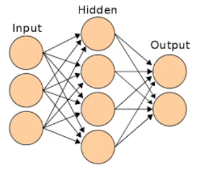

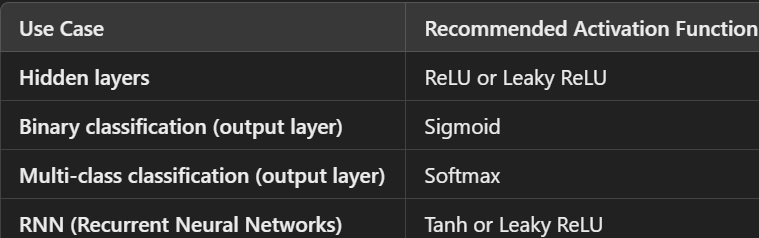

In [4]:
import tensorflow as tf
tf.random.set_seed(3)
#more number of times u run ur nn , more diff values u get thus, we use random seed to give it a fixed value so that value doesnt change everytime
from tensorflow import keras
#keras is a wrapper class library so if u want to integrate it with pytorch instead of tensorflow as backend u can also use it with that
#keras is an improved version with few api integrations


In [5]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])
#number of inout neurons= number of eatures 
#thus we use flatten to create a single dimensional array
#1 input 1 hidden 1 output
#Dense means seach neuron connected to all other neurons in previous layer
#number of output neurons= number of lasses we have in output


C:\Users\Aakriti\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#comiling the neural network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#in one hot encoding we use categorical crossentropy 
#in numerical we use sparse


#numerical:  dog 0 cat 1 horse 2
#one hot :   dog[100] cat[010] horse[001]


In [7]:
#training the neural nerwork
#vs= is like train test split same thing
#epochs= ho wmany time the model has to go through the data
histor=model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6500 - loss: 152.4795 - val_accuracy: 0.6522 - val_loss: 108.1432
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6500 - loss: 104.1527 - val_accuracy: 0.6522 - val_loss: 62.5887
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6500 - loss: 53.9680 - val_accuracy: 0.6522 - val_loss: 14.2144
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6471 - loss: 7.1334 - val_accuracy: 0.3478 - val_loss: 8.2202
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4209 - loss: 5.5234 - val_accuracy: 0.7609 - val_loss: 1.3305
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7632 - loss: 1.6814 - val_accuracy: 0.7391 - val_loss: 0.7099
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7647 - loss: 0.6205 - val_accuracy: 0.8913 - val_loss: 0.2504
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9005 - loss: 0.3912 - val_accuracy: 0

In [8]:
#standardise the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_std=scaler.fit_transform(X_train)
x_test_std=scaler.transform(X_test)

In [9]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history=model.fit(x_train_std,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10


C:\Users\Aakriti\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5203 - loss: 0.7570 - val_accuracy: 0.6957 - val_loss: 0.5656
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7384 - loss: 0.5318 - val_accuracy: 0.8043 - val_loss: 0.4040
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8058 - loss: 0.3973 - val_accuracy: 0.8913 - val_loss: 0.3098
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8657 - loss: 0.3121 - val_accuracy: 0.9130 - val_loss: 0.2508
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9058 - loss: 0.2544 - val_accuracy: 0.9130 - val_loss: 0.2106
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9119 - loss: 0.2146 - val_accuracy: 0.9130 - val_loss: 0.1829
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9347 - loss: 0.1864 - val_accuracy: 0.9348 - val_loss: 0.1631
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9462 - loss: 0.1657 - val_accuracy: 0.9348 - val_loss: 0.

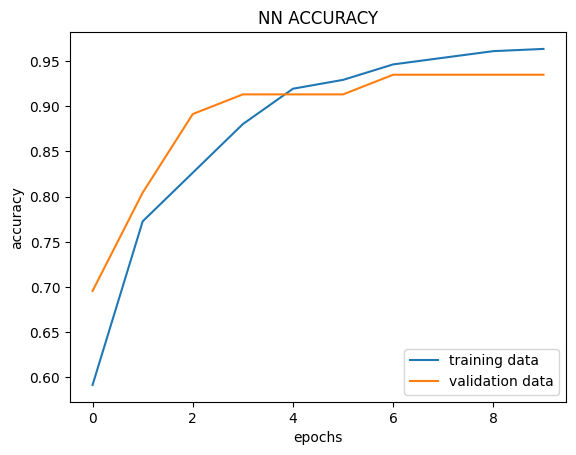

In [10]:
#visualising accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('NN ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data','validation data'],loc='lower right')

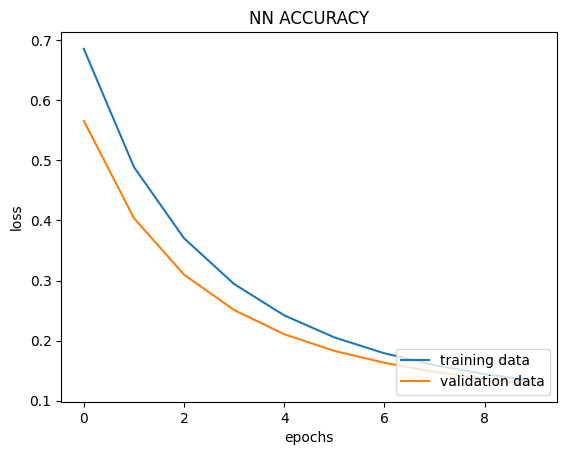

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('NN ACCURACY')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training data','validation data'],loc='lower right')

In [13]:
loss,acc=model.evaluate(x_test_std,Y_test)
print(acc)
print(loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9470 - loss: 0.1449
0.9561403393745422
0.13831572234630585


In [15]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [18]:
y_pred=model.predict(x_test_std)
print(y_pred.shape)
print(y_pred[0])
#this gives us the probability that model gives label 0 and the next one gives probability that the label is 1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
(114, 2)
[0.4910598  0.48694757]


model.predict()=>gives the prediction probability 

In [19]:
#converting the prediction probability to class labels
y_pred_labels=[np.argmax(i) for i in y_pred ]
print(y_pred_labels)


[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


BUILDING THE PREDICTIVE SYSTEM

In [22]:
inputt=(20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902)
inpa=np.asarray(inputt)
inpr=inpa.reshape(1,-1)
#standardising the input data
inps=scaler.transform(inpr)
pred=model.predict(inps)
print(pred)
pred_label=[np.argmax(pred)]
print(pred_label)
if(pred_label[0]==0):
    print("the tumor is malignant")
else:
    
    print("the tumor is benign")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

C:\Users\Aakriti\miniconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[0.5926359  0.07451374]]
[0]
the tumor is malignant
